## pCMV-Target-ACEmax
QUEEN script for pCMV-Target-ACEmax construction.
1. The C-terminus region of Target-AIDmax was amplified from pUC-optimized-PmCDA1-ugi using the primer pair SI1304/SI1307.
2. A plasmid backbone was amplified from pCMV-ABEmax using the primer pair SI1310/SI1309.
3. An ABEmax fragment was amplified from pCMV-ABEmax using the primer pair SI945/SI1305.
4. The three fragments were assembled by Gibson Assembly.

In [1]:
%matplotlib inline

In [2]:
import sys
sys.path.append("/Users/hideto/dropbox/HIDETO_MORI.LAB/Experiments/Project/Dbrick/github")
import copy
sys.path.append("../../")
from QUEEN.queen import *
set_namespace(globals())
if "output" not in os.listdir("./"):
    os.mkdir("output")

<Figure size 72x72 with 0 Axes>

In [3]:
QUEEN(record="https://benchling.com/s/seq-OCkN5m6U6st0I9ToyOn1", dbtype="benchling", product="pCMV_ABEmax")  #Load pCMV-ABEmax plasmid object.
QUEEN(record="https://benchling.com/s/seq-APwTvCrCHnd38ugWloNK", dbtype="benchling", product="opt_CDA1_ugi") #Load opt_CDA1_ugi plasmid object.

<queen.QUEEN object; project='opt_CDA1_ugi', length='3874 bp', topology='circular'>

In [4]:
processname1 = "PCR"
description1 = "1. The C-terminus region of Target-AIDmax was amplified from pUC-optimized-PmCDA1-ugi using the primer pair SI1304/SI1307."
QUEEN(seq="CCTGTCTCAGCTGGGAGGTGACGGCGGAGGAGGAACTGGAGGAGG", product="SI1304") #Create a QUEEN object for the forward primer.
QUEEN(seq="TCAGCGGGTTTAAACTCATTATCACAGCATTTTGATTTTGTTCTC", product="SI1307") #Create a QUEEN object for the forward primer.
opt_CDA1_ugi.searchsequence(SI1304.seq[-18:], product="FW7", pn=processname1, pd=description1)        #Search for the 18-bp 3’-end sequences of the forward primer.
opt_CDA1_ugi.searchsequence(SI1307.seq[-18:], product="RV7", pn=processname1, pd=description1)        #Search for the 18-bp 3’-end sequences of the reverse primer.
cropdna(opt_CDA1_ugi, FW7[0].end, RV7[0].start, product="extract7", pn=processname1, pd=description1) #Crop the internal DNA sequence flanked by the primer annealing sites.
modifyends(extract7, SI1304.seq, SI1307.rcseq, product="fragment7", pn=processname1, pd=description1) #Add forward and reverse primer sequences to the both ends of the cropped fragment. 

<queen.QUEEN object; project='fragment7', length='1231 bp', topology='linear'>

In [5]:
processname2 = "PCR"
description2 = "2. A plasmid backbone was amplified from pCMV-ABEmax using the primer pair SI1310/SI1309."
QUEEN(seq="TGATAATGAGTTTAAACCCGCTGA", product="SI1310")      #Create a QUEEN object for the forward primer.
QUEEN(seq="GACTTTCCGCTTCTTCTTTGGTGACTCG", product="SI1309")  #Create a QUEEN object for the forward primer.
pCMV_ABEmax.searchsequence(SI1310.seq[-18:], product="FW8", pn=processname2, pd=description2)         #Search for the 18-bp 3’-end sequences of the forward primer.
pCMV_ABEmax.searchsequence(SI1309.seq[-18:], product="RV8", pn=processname2, pd=description2)         #Search for the 18-bp 3’-end sequences of the reverse primer.
cropdna(pCMV_ABEmax, FW8[0].end, RV8[0].start,  product="extract8", pn=processname2, pd=description2) #Crop the internal DNA sequence flanked by the primer annealing sites.
modifyends(extract8, SI1310.seq, SI1309.rcseq, product="fragment8", pn=processname2, pd=description2) #Add forward and reverse primer sequences to the both ends of the cropped fragment. 

<queen.QUEEN object; project='fragment8', length='3439 bp', topology='linear'>

In [6]:
processname3 = "PCR"
description3 = "3. An ABEmax fragment was amplified from pCMV-ABEmax using the primer pair SI945/SI1305."
QUEEN(seq="GTCACCTCCCAGCTGAGACAGGTCG", product="SI1305")                                                #Create a QUEEN object for the forward primer.
QUEEN(seq="AGATCCGCGGCCGCTAATACGACTCACTATAGG", product="SI945", pn=processname3, pd=description3)       #Create a QUEEN object for the forward primer.
pCMV_ABEmax.searchsequence(SI945.seq[-18:], product="FW13", pn=processname3, pd=description3)           #Search for the 18-bp 3’-end sequences of the forward primer.
pCMV_ABEmax.searchsequence(SI1305.seq[-18:], product="RV13", pn=processname3, pd=description3)          #Search for the 18-bp 3’-end sequences of the reverse primer.
cropdna(pCMV_ABEmax, FW13[0].end, RV13[0].start, product="extract13", pn=processname3, pd=description3) #Crop the internal DNA sequence flanked by the primer annealing sites.
modifyends(extract13, SI945.seq, SI1305.rcseq, product="fragment13", pn=processname3, pd=description3)  #Add forward and reverse primer sequences to the both ends of the cropped fragment. 

<queen.QUEEN object; project='fragment13', length='5392 bp', topology='linear'>

In [7]:
processname4 = "Gibson Assembly"
description4 = "4. The three fragments were assembled by Gibson Assembly."
modifyends(fragment7, "*{22}/-{22}", "-{24}/*{24}",  product="fragment7_mod", pn=processname4, pd=description4)   #Generate long sticky ends on the both sides of "fragment6".
modifyends(fragment8, "*{24}/-{24}","-{103}/*{103}", product="fragment8_mod", pn=processname4, pd=description4)   #Generate long sticky ends on the both sides of "fragment7".
modifyends(fragment13, "*{103}/-{103}","-{22}/*{22}", product="fragment13_mod", pn=processname4, pd=description4) #Generate long sticky ends on the both sides of "fragment8".
joindna(fragment7_mod, fragment8_mod, fragment13_mod, topology="circular", product="pCMV_Target_ACEmax", pn=processname4, pd=description4) #Join the fragments.

<queen.QUEEN object; project='pCMV_Target_ACEmax', length='9913 bp', topology='circular'>

In [8]:
pCMV_Target_ACEmax.printfeature()

feature_id  feature_type  qualifier:label         start  end   strand  
0           source        source                  0      2950  +       
100         primer_bind   BGH-rev                 4      22    -       
200         polyA_signal  bGH poly(A) signal      10     235   +       
300         primer_bind   M13 Reverse             305    322   -       
400         primer_bind   M13/pUC Reverse         318    341   -       
500         protein_bind  lac operator            329    346   +       
600         promoter      lac promoter            353    384   -       
700         protein_bind  CAP binding site        398    420   +       
800         primer_bind   L4440                   536    554   -       
900         rep_origin    ori                     707    1296  -       
1000        primer_bind   pBR322ori-F             787    807   -       
1100        CDS           AmpR                    1466   2327  -       
1200        primer_bind   Amp-R                   2089   2109  +

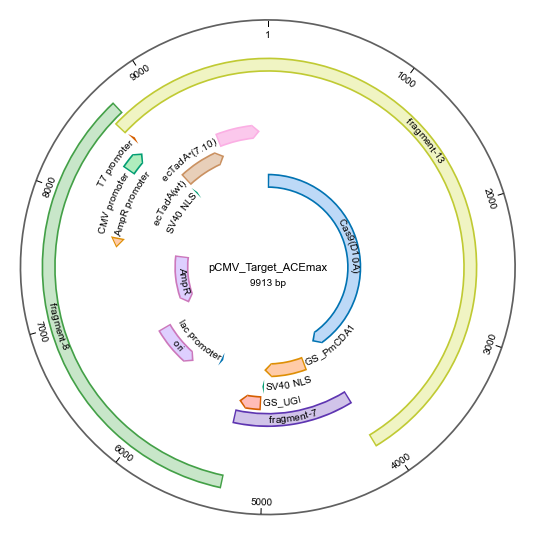

In [9]:
def add_fragment_annotation(dna, fragment, new_feature_id, color_set):
    """
    Define seqeunce featurtes for "fragment" in "dna". 
    """
    f = dna.searchsequence(fragment.seq) #Search for "fragment" seqeunce in "dna"
    editfeature(dna, source=f, target_attribute="feature_id", operation=createattribute(new_feature_id), new_copy=False)                                                      #Define a new feature whose feature_id becomes "new_feature_id".
    editfeature(dna, key_attribute="feature_id", query=new_feature_id, target_attribute="qualifier:label", operation=createattribute(new_feature_id), new_copy=False)         #Provide a qualifier:label to the new feature.
    editfeature(dna, key_attribute="feature_id", query=new_feature_id, target_attribute="qualifier:edgecolor_queen", operation=createattribute(color_set[0]), new_copy=False) #Set a edge color for the new feature.
    editfeature(dna, key_attribute="feature_id", query=new_feature_id, target_attribute="qualifier:facecolor_queen", operation=createattribute(color_set[1]), new_copy=False) #Set a face color for the new feature.
    editfeature(dna, key_attribute="feature_id", query=new_feature_id, target_attribute="strand", operation=replaceattribute(0), new_copy=False)                              #Set a coding direction of the new feature
    
def visualization(dna):
    """
    Set the start position of "dna" and visualize its circular sequence map. 
    """
    dna.searchfeature(key_attribute="qualifier:label", query="^Cas9", product="Cas9")           #Search for the feature that represent the Cas9 gene.
    plasmid   = joindna(cutdna(dna, Cas9[0].start)[0], topology="circular")                     #Set the first nucleotide of the Cas9 gene as the start position of the plasmid.
    fragments = plasmid.searchfeature(key_attribute="qualifier:label", query="fragment-[0-9]+") #Obtain the features whose feature_id are "fragment-[0-9]+".
    fragments.sort(key=lambda x:x.qualifiers["label"][0])                                       #Sort the order of fragments according to qualifier.label.
    features  = plasmid.searchfeature(key_attribute="feature_type", query="CDS") + plasmid.searchfeature(key_attribute="feature_type", query="promoter") + plasmid.searchfeature(key_attribute="feature_type", query="rep_origin") + fragments #Select the sequence features to be visualized.
    fig        = visualizemap(plasmid, feature_list=features, map_view="circular", tick_interval=1000, title=dna.project) #Visualize the circular seqeunce map of the plasmid.
    return fig, plasmid


#Paris of color codes for gene edge and face 
color_sets = [('#E53935', '#ffcdd2'), ('#8E24AA', '#e1bee7'), ('#3949AB', '#c5cae9'), ('#1E88E5', '#bbdefb'), ('#00ACC1', '#b2ebf2'), ('#D81B60', '#f8bbd0'), ('#5E35B1', '#d1c4e9'), 
              ('#43A047', '#c8e6c9'), ('#7CB342', '#dcedc8'), ('#FDD835', '#fff9c4'), ('#FB8C00', '#ffe0b2'), ('#6D4C41', '#d7ccc8'), ('#C0CA33', '#f0f4c3'), ('#546E7A', '#cfd8dc')]

add_fragment_annotation(pCMV_Target_ACEmax, fragment7,  "fragment-7",  color_sets[6])  #Add "fragment-7" to .dnafeatures of "pCMV_Target_AIDmax" plasmid object. 
add_fragment_annotation(pCMV_Target_ACEmax, fragment8,  "fragment-8",  color_sets[7])  #Add "fragment-8" to .dnafeatures of "pCMV_Target_AIDmax" plasmid object. 
add_fragment_annotation(pCMV_Target_ACEmax, fragment13, "fragment-13", color_sets[12]) #Add "fragment-13" to .dnafeatures of "pCMV_Target_AIDmax" plasmid object. 
fig, plasmid = visualization(pCMV_Target_ACEmax)        #Visualize the circular sequence map of pCMV-Target-ACEmax.
fig.savefig("output/pCMV_Target_ACEmax.pdf")

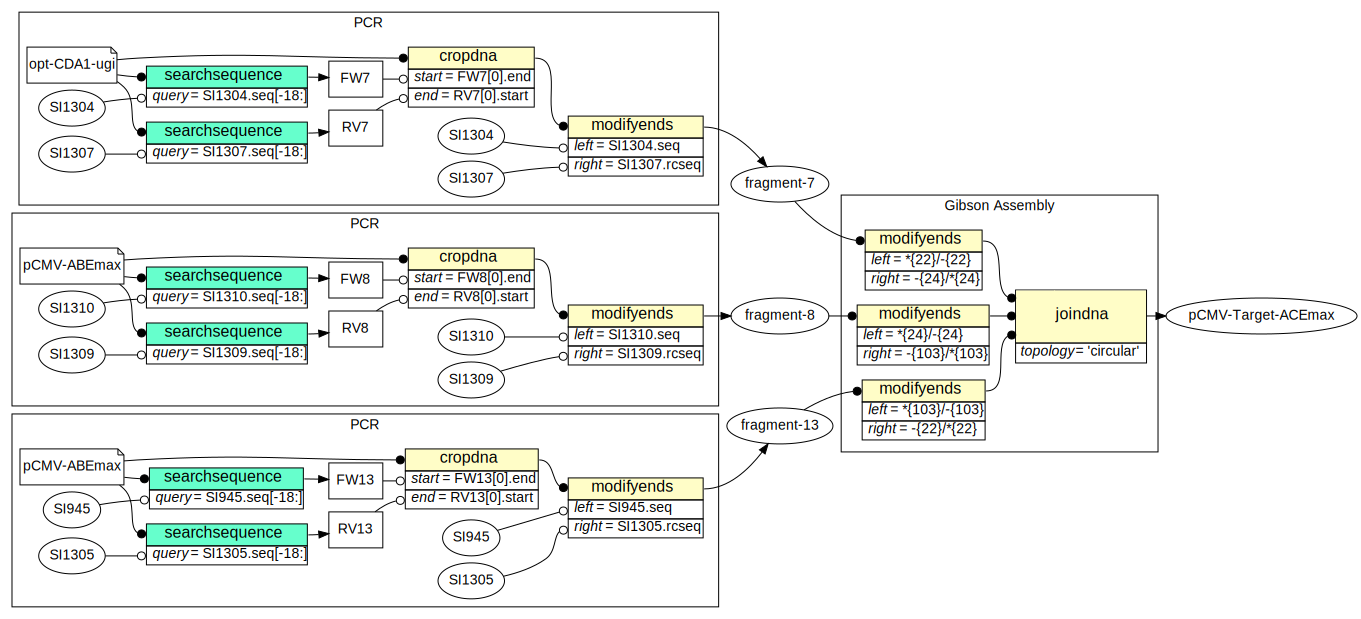

In [10]:
#Visualize the operational process chart of pCMV-Target-ACEmax.
flow = visualizeflow(pCMV_Target_ACEmax, alias_dict={"fragment7":"fragment-7", "fragment8":"fragment-8", "fragment13":"fragment-13", "pCMV_ABEmax":"pCMV-ABEmax", "pCMV_Target_ACEmax":"pCMV-Target-ACEmax", "opt_CDA1_ugi":"opt-CDA1-ugi"})
flow.render("output/pCMV_Target_ACEmax_construction")
flow

In [11]:
pCMV_Target_ACEmax.outputgbk("output/pCMV-Target-ACEmax.gbk")

In [12]:
#Generate and execute the quine code and confirm if the cloned QUEEN_object is identical to the original one.
quine(pCMV_Target_ACEmax, execution=True)

True

In [13]:
#Extract the narrative descriptions linked to the operational processes.
quine(pCMV_Target_ACEmax, process_description=True)

1. The C-terminus region of Target-AIDmax was amplified from pUC-optimized-PmCDA1-ugi using the primer pair SI1304/SI1307.
2. A plasmid backbone was amplified from pCMV-ABEmax using the primer pair SI1310/SI1309.
3. An ABEmax fragment was amplified from pCMV-ABEmax using the primer pair SI945/SI1305.
4. The three fragments were assembled by Gibson Assembly.
